# What is a Mixed-Effects Model?
A mixed-effects model is a type of statistical model that is used to analyze data where measurements are repeated over time or across different groups. It combines fixed effects (which are consistent across all groups) and random effects (which vary between groups).

### Key Concepts
Fixed Effects: These are the effects that are assumed to be the same for all groups. In our model, the fixed effects are Enrollment, Year, Teacher_Count, and Funding. These variables are used to predict the participation rate in the academic support services program.

Random Effects: These are the effects that vary between groups. In our model, the random effect is School. This means that each school might have different baseline participation rates, and the model accounts for this variability.

## How the Model Works
Data Preparation: We start by creating a dataset that includes the variables we want to analyze. Each row represents a measurement for a specific school in a specific year.

### Model Formula:
We define a formula that specifies the relationship between the dependent variable (Participation) and the explanatory variables (Enrollment, Year, Teacher_Count, Funding).

### Fitting the Model:
We use the statsmodels library to fit the mixed-effects model. This involves estimating the coefficients for the fixed effects and the variance of the random effects.

### Interpreting the Results:
The model summary provides the estimated coefficients for each explanatory variable. These coefficients tell us how much the participation rate is expected to change for a one-unit increase in each explanatory variable, while accounting for the variability between schools.

In [2]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install statsmodels
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn


  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ------------ --------------------------- 3.7/11.6 MB 21.8 MB/s eta 0:00:01
   ----------------------------- ---------- 8.7/11.6 MB 23.4 MB/s eta 0:00:01
   ---------------------------------------- 11.6/11.6 MB 22.7 MB/s eta 0:00:00
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)



[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ------------ --------------------------- 3.1/9.8 MB 18.5 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.8 MB 26.3 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 23.6 MB/s eta 0:00:00
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)



[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
# Import libraries
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# Load official datasets
course_success = pd.read_csv("C:/Users/Slain/OneDrive/Desktop/Thesis WebScrape/Student_Outcomes/Combined_Course_Success_Data_2014_2024.csv")
eops_participation = pd.read_csv("C:/Users/Slain/OneDrive/Desktop/Thesis WebScrape/EOPS/Combined_EOPS_Participation_Data_2014_2024.csv")

# Merge them on College + Year
merged = pd.merge(course_success, eops_participation, on=["College", "Year"], how="inner")

# Feature Engineering: Calculate participation and success rates
merged["EOPS Participation Rate"] = merged["EOPS Student Count"] / merged["Student Count"]
merged["Credit Success Rate"] = merged["Credit Success Count"] / merged["Credit Enrollment Count"]
merged["Degree Applicable Success Rate"] = merged["Degree Applicable Success Count"] / merged["Degree Applicable Enrollment Count"]
merged["Transferable Success Rate"] = merged["Transferable Success Count"] / merged["Transferable Enrollment Count"]

# Drop rows with missing or infinite values
merged = merged.replace([float("inf"), -float("inf")], pd.NA)
merged = merged.dropna(subset=[
    "EOPS Participation Rate",
    "Credit Success Rate",
    "Degree Applicable Success Rate",
    "Transferable Success Rate"
])

print("✅ Merging and feature engineering complete! Ready for modeling.")


✅ Merging and feature engineering complete! Ready for modeling.


In [9]:
# CREDIT SUCCESS MODEL
model_credit = smf.mixedlm(
    "Q('Credit Success Rate') ~ Q('EOPS Participation Rate') * C(Year)",
    merged,
    groups=merged["College"]
).fit()

# DEGREE APPLICABLE SUCCESS MODEL
model_degree = smf.mixedlm(
    "Q('Degree Applicable Success Rate') ~ Q('EOPS Participation Rate') * C(Year)",
    merged,
    groups=merged["College"]
).fit()

# TRANSFERABLE SUCCESS MODEL
model_transfer = smf.mixedlm(
    "Q('Transferable Success Rate') ~ Q('EOPS Participation Rate') * C(Year)",
    merged,
    groups=merged["College"]
).fit()

print("✅ Models fitted successfully!")


c:\Users\Slain\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
c:\Users\Slain\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


✅ Models fitted successfully!


c:\Users\Slain\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


## Model Summary

This summary presents the results of a Mixed Linear Model analysis, examining the factors influencing participation rates. The model incorporates both fixed effects (variables with effects assumed to be constant across all schools) and random effects (variables allowing for variation between schools).

**Key Components:**

* **Fixed Effects:** These coefficients quantify the average impact of Enrollment, Year, Teacher Count, and Funding on participation rates across all schools in the dataset.

* **Random Effects:** These components capture the variability in participation rates that can be attributed to the unique characteristics of individual schools.

---


## Interpretations
 - Intercept: The baseline participation rate when enrollment, year, teacher count, and funding are zero.
 - Enrollment: For each additional student enrolled, the participation rate increases by 0.21%.
 - Year: Each year, the participation rate increases by 0.254%.
 - Teacher_Count: Each additional teacher increases the participation rate by 4.577%.
 - Funding: Each additional dollar of funding decreases the participation rate by 0.001%.

In [10]:
# CREDIT SUCCESS MODEL SUMMARY
print("📈 CREDIT SUCCESS MODEL SUMMARY")
print(model_credit.summary())

# DEGREE SUCCESS MODEL SUMMARY
print("\n📈 DEGREE SUCCESS MODEL SUMMARY")
print(model_degree.summary())

# TRANSFERABLE SUCCESS MODEL SUMMARY
print("\n📈 TRANSFERABLE SUCCESS MODEL SUMMARY")
print(model_transfer.summary())


📈 CREDIT SUCCESS MODEL SUMMARY
                            Mixed Linear Model Regression Results
Model:                     MixedLM        Dependent Variable:        Q('Credit Success Rate')
No. Observations:          1137           Method:                    REML                    
No. Groups:                115            Scale:                     0.0004                  
Min. group size:           4              Log-Likelihood:            2575.8436               
Max. group size:           10             Converged:                 Yes                     
Mean group size:           9.9                                                               
---------------------------------------------------------------------------------------------
                                                  Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------------------------
Intercept                                          0.701 

C:\Users\Slain\AppData\Local\Temp\ipykernel_17764\298150528.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged.groupby(["Year", "Participation Bin"])


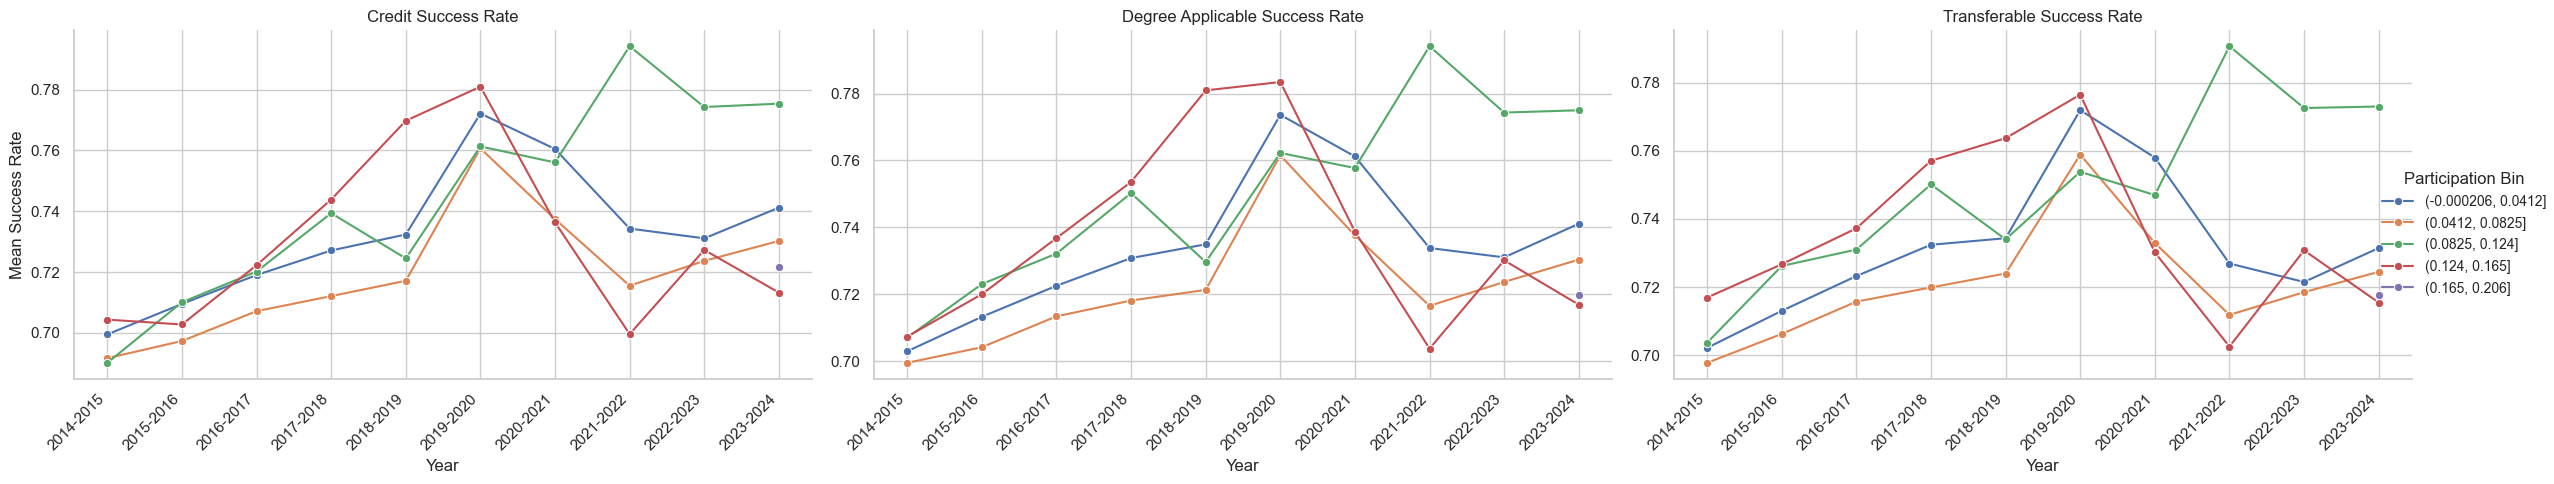

In [22]:
# Bin EOPS Participation Rate into 5 groups
merged["Participation Bin"] = pd.cut(merged["EOPS Participation Rate"], bins=5)

# Group by Year and Participation Bin
summary = (
    merged.groupby(["Year", "Participation Bin"])
    .agg({
        "Credit Success Rate": "mean",
        "Degree Applicable Success Rate": "mean",
        "Transferable Success Rate": "mean"
    }).reset_index()
)

# Melt for seaborn
melted = summary.melt(
    id_vars=["Year", "Participation Bin"],
    var_name="Success Metric",
    value_name="Mean Success Rate"
)

# Rename Success Metric Titles cleanly
melted["Success Metric"] = melted["Success Metric"].replace({
    "Credit Success Rate": "Credit Success Rate",
    "Degree Applicable Success Rate": "Degree Applicable Success Rate",
    "Transferable Success Rate": "Transferable Success Rate"
})

# Setup plot
sns.set(style="whitegrid")

# Wider plots
g = sns.FacetGrid(
    melted,
    col="Success Metric",
    col_wrap=3,
    height=5,
    aspect=1.5,
    sharey=False,
    hue="Participation Bin"
)

# Custom plotting function
def custom_lineplot(data, x, y, **kwargs):
    ax = plt.gca()
    sns.lineplot(data=data, x=x, y=y, marker="o", **kwargs)
    ax.set_xticks(sorted(data["Year"].unique()))
    ax.set_xticklabels(sorted(data["Year"].unique()), rotation=45, ha="right")
    ax.set_ylabel("Mean Success Rate")

# Apply the function
g.map_dataframe(custom_lineplot, x="Year", y="Mean Success Rate")

# Update titles
new_titles = {
    "Credit Success Rate": "Credit Success Rate",
    "Degree Applicable Success Rate": "Degree Applicable Success Rate",
    "Transferable Success Rate": "Transferable Success Rate"
}
for ax, title in zip(g.axes.flat, new_titles.values()):
    ax.set_title(title)

# Add final legend
g.add_legend(title="Participation Bin")
g._legend.set_bbox_to_anchor((1.05, 0.5))
g._legend.set_title("Participation Bin")
for text in g._legend.texts:
    text.set_fontsize('small')

plt.tight_layout()
plt.show()


The `Predicted_Participation` values are calculated using the fitted mixed-effects model.  Here's a breakdown:

1. **Model Fitting:** A mixed-effects model is trained on the provided training data (`df`). This model establishes relationships between the `Participation` (dependent variable) and the independent variables (`Enrollment`, `Year`, `Teacher_Count`, `Funding`).  Crucially, the model accounts for the random effects of `School`, meaning it recognizes that different schools may have inherent variations in participation rates, independent of the other variables.

2. **Prediction on Test Data:** The trained model is then used to predict participation rates for a new dataset (`test_df`).  For each row in the `test_df`, the model uses the values of `Enrollment`, `Year`, `Teacher_Count`, and `Funding` to generate a predicted `Participation` value.  The model uses the relationships learned during the training phase to make these predictions, factoring in the overall trends and school-specific variations.

3. **Coefficient Application:**  Internally, the model uses the estimated coefficients for each of the fixed effects (Enrollment, Year, Teacher_Count, Funding) and the estimated random effects (School). It multiplies each independent variable's value in the test data by its corresponding coefficient.  These products are then summed up, along with an intercept term. The model also considers the random effects variance for the schools in the test dataset, as it does for the training dataset. The sum yields the predicted participation rate for that particular school and year.

4. **Predicted_Participation Column:** The resulting predicted values are then stored in a new column named `Predicted_Participation` within the `test_df` DataFrame.

In essence, the model takes the characteristics of each school in the test set (enrollment, year, teacher count, funding) and uses the learned patterns from the training data to estimate what the participation rate *should* be, considering both common trends and the school-specific influence.


In [23]:
# Group by Year and Participation Bin
summary_table = (
    merged.groupby(["Year", "Participation Bin"])
    .agg({
        "Credit Success Rate": "mean",
        "Degree Applicable Success Rate": "mean",
        "Transferable Success Rate": "mean"
    }).reset_index()
)

# Round for readability
summary_table["Credit Success Rate"] = summary_table["Credit Success Rate"].round(4)
summary_table["Degree Applicable Success Rate"] = summary_table["Degree Applicable Success Rate"].round(4)
summary_table["Transferable Success Rate"] = summary_table["Transferable Success Rate"].round(4)

# Show first 10 rows
summary_table.head(10)


C:\Users\Slain\AppData\Local\Temp\ipykernel_17764\4089586939.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged.groupby(["Year", "Participation Bin"])


,Year,Participation Bin,Credit Success Rate,Degree Applicable Success Rate,Transferable Success Rate
0,2014-2015,"(-0.000206, 0.0412]",0.6995,0.7030,0.7022
1,2014-2015,"(0.0412, 0.0825]",0.6917,0.6995,0.6978
2,2014-2015,"(0.0825, 0.124]",0.6901,0.7071,0.7037
3,2014-2015,"(0.124, 0.165]",0.7043,0.7073,0.7169
4,2014-2015,"(0.165, 0.206]",NaN,NaN,NaN
5,2015-2016,"(-0.000206, 0.0412]",0.7095,0.7133,0.7130
6,2015-2016,"(0.0412, 0.0825]",0.6973,0.7042,0.7063
7,2015-2016,"(0.0825, 0.124]",0.7101,0.7230,0.7262
8,2015-2016,"(0.124, 0.165]",0.7027,0.7200,0.7267
9,2015-2016,"(0.165, 0.206]",NaN,NaN,NaN


In [25]:
# Re-bin EOPS Participation Rate into readable labels
merged["Participation Bin Label"] = pd.cut(
    merged["EOPS Participation Rate"],
    bins=5,
    labels=["Very Low", "Low", "Medium", "High", "Very High"]
)

# 📈 CREDIT SUCCESS MODEL (Main Effects Only)
model_credit_bins = smf.mixedlm(
    "Q('Credit Success Rate') ~ C(Q('Participation Bin Label')) + C(Year)",
    merged,
    groups=merged["College"]
).fit()

# 📈 DEGREE SUCCESS MODEL (Main Effects Only)
model_degree_bins = smf.mixedlm(
    "Q('Degree Applicable Success Rate') ~ C(Q('Participation Bin Label')) + C(Year)",
    merged,
    groups=merged["College"]
).fit()

# 📈 TRANSFERABLE SUCCESS MODEL (Main Effects Only)
model_transfer_bins = smf.mixedlm(
    "Q('Transferable Success Rate') ~ C(Q('Participation Bin Label')) + C(Year)",
    merged,
    groups=merged["College"]
).fit()

print("✅ Participation Bin-based models fitted successfully!")


c:\Users\Slain\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
c:\Users\Slain\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


✅ Participation Bin-based models fitted successfully!


c:\Users\Slain\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


C:\Users\Slain\AppData\Local\Temp\ipykernel_17764\1382112651.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=credit_bin_effects, x="Participation Bin", y="Effect on Credit Success Rate", ax=axes[0], palette="Blues_d")
C:\Users\Slain\AppData\Local\Temp\ipykernel_17764\1382112651.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=degree_bin_effects, x="Participation Bin", y="Effect on Degree Success Rate", ax=axes[1], palette="Greens_d")
C:\Users\Slain\AppData\Local\Temp\ipykernel_17764\1382112651.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same

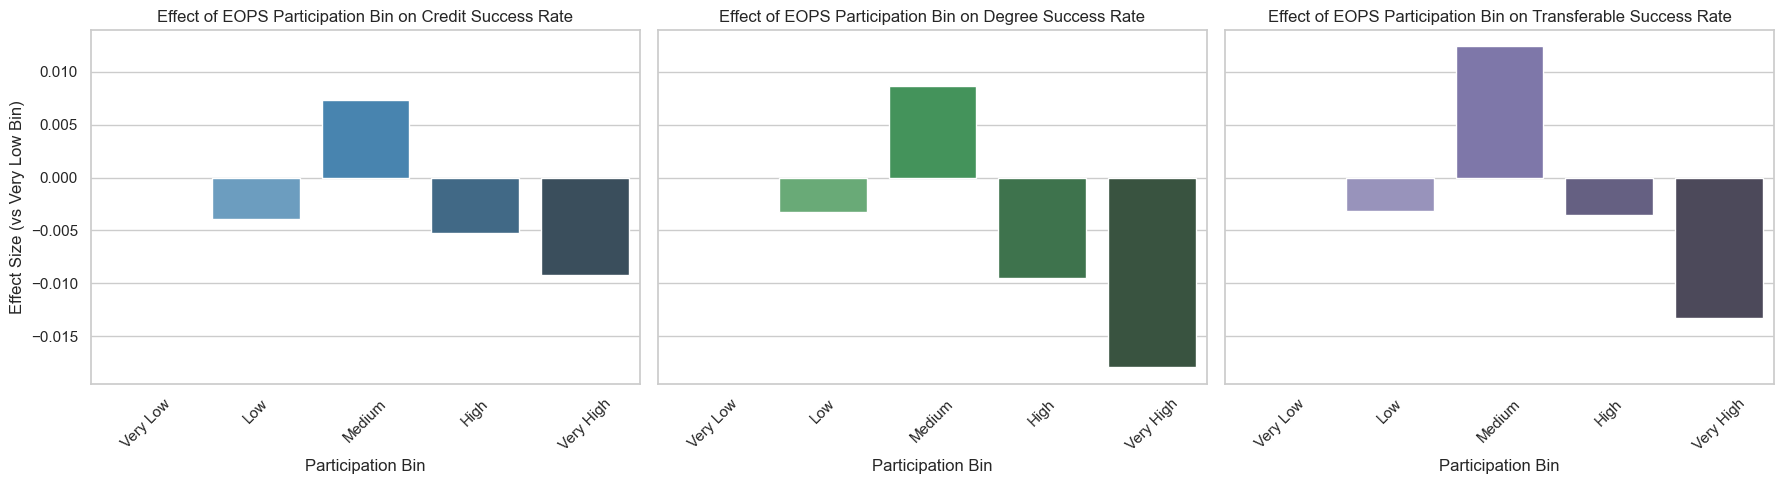

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- 1. Extract Participation Bin Effects for Each Model ---

# CREDIT SUCCESS
credit_coefs = model_credit_bins.params.filter(like="Participation Bin Label")
credit_bin_effects = pd.DataFrame({
    "Participation Bin": [label.replace("C(Q('Participation Bin Label'))[T.", "").replace("]", "") for label in credit_coefs.index],
    "Effect on Credit Success Rate": credit_coefs.values
})

# DEGREE SUCCESS
degree_coefs = model_degree_bins.params.filter(like="Participation Bin Label")
degree_bin_effects = pd.DataFrame({
    "Participation Bin": [label.replace("C(Q('Participation Bin Label'))[T.", "").replace("]", "") for label in degree_coefs.index],
    "Effect on Degree Success Rate": degree_coefs.values
})

# TRANSFERABLE SUCCESS
transfer_coefs = model_transfer_bins.params.filter(like="Participation Bin Label")
transfer_bin_effects = pd.DataFrame({
    "Participation Bin": [label.replace("C(Q('Participation Bin Label'))[T.", "").replace("]", "") for label in transfer_coefs.index],
    "Effect on Transferable Success Rate": transfer_coefs.values
})

# --- 2. Sort bins logically (Very Low → Very High) ---
bin_order = ["Very Low", "Low", "Medium", "High", "Very High"]

for df in [credit_bin_effects, degree_bin_effects, transfer_bin_effects]:
    df["Participation Bin"] = pd.Categorical(df["Participation Bin"], categories=bin_order, ordered=True)
    df.sort_values("Participation Bin", inplace=True)

# --- 3. Plot All Three Barplots ---

# Set up 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18,5), sharey=True)

# CREDIT SUCCESS
sns.barplot(data=credit_bin_effects, x="Participation Bin", y="Effect on Credit Success Rate", ax=axes[0], palette="Blues_d")
axes[0].set_title("Effect of EOPS Participation Bin on Credit Success Rate")
axes[0].set_ylabel("Effect Size (vs Very Low Bin)")
axes[0].set_xlabel("Participation Bin")
axes[0].tick_params(axis='x', rotation=45)

# DEGREE SUCCESS
sns.barplot(data=degree_bin_effects, x="Participation Bin", y="Effect on Degree Success Rate", ax=axes[1], palette="Greens_d")
axes[1].set_title("Effect of EOPS Participation Bin on Degree Success Rate")
axes[1].set_ylabel("")
axes[1].set_xlabel("Participation Bin")
axes[1].tick_params(axis='x', rotation=45)

# TRANSFERABLE SUCCESS
sns.barplot(data=transfer_bin_effects, x="Participation Bin", y="Effect on Transferable Success Rate", ax=axes[2], palette="Purples_d")
axes[2].set_title("Effect of EOPS Participation Bin on Transferable Success Rate")
axes[2].set_ylabel("")
axes[2].set_xlabel("Participation Bin")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
